Data Exploration with application of polynomial regression ML

In [2]:
# Import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# Read cleaned file
df = pd.read_csv("../Data/cleaned_data.csv")

In [4]:
# Grabbing relevant column names that contribute to covid risk factors 
column_names = ['Mean Age','% Male','Smoking history', 'Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
                'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)', 'Myalgia (Muscle Pain)',
                'Fatigue', 'Upper air-way congestion', 'Diarrhoea', 'Nausea or Vomiting', 'Loss of Appetite/Anorexia',
                'Sore Throat/Stuffy Nose', 'Chills', 'Chest Pain', 'Loss of smell/taste', 'Disease Severity Asymptomatic',
                'Mortality']

dataset = pd.DataFrame(df,columns=column_names)
# dataset = dataset.values


In [5]:
# Assign x and y variables 
X = dataset.drop("Mortality", axis=1)
y = dataset['Mortality']


In [6]:
# Reshape y 
y=y.values.reshape(-2,1)

In [7]:
# Test/train split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

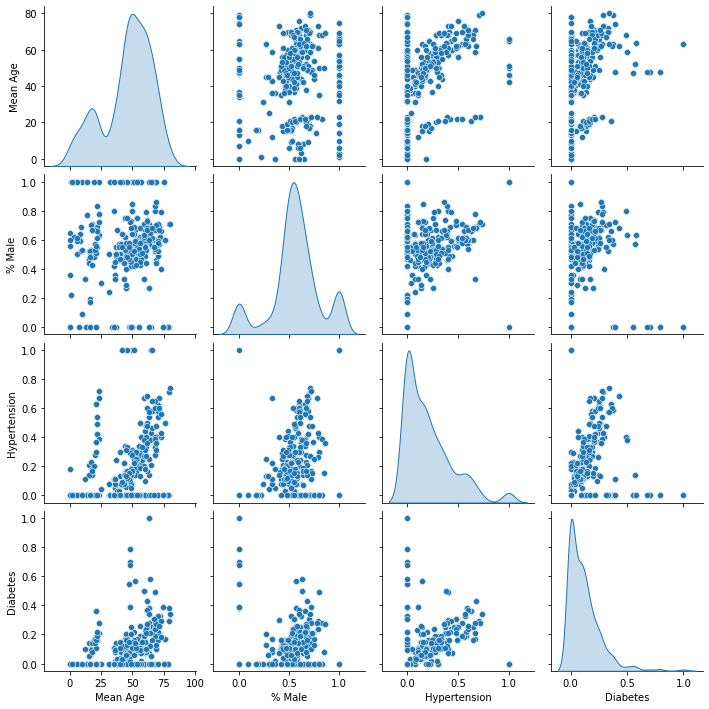

In [8]:
# Plot pairs for correlation/trends 
sns.pairplot(X_train[['Mean Age', '% Male', 'Hypertension', 'Diabetes']], diag_kind='kde')

In [9]:
# Instantiate Linear regression 
model = LinearRegression()
# Fit
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

In [10]:
# Model evaluation
score = r2_score(y_test, y_pred)
print(score)

0.459677452259348


<AxesSubplot:>

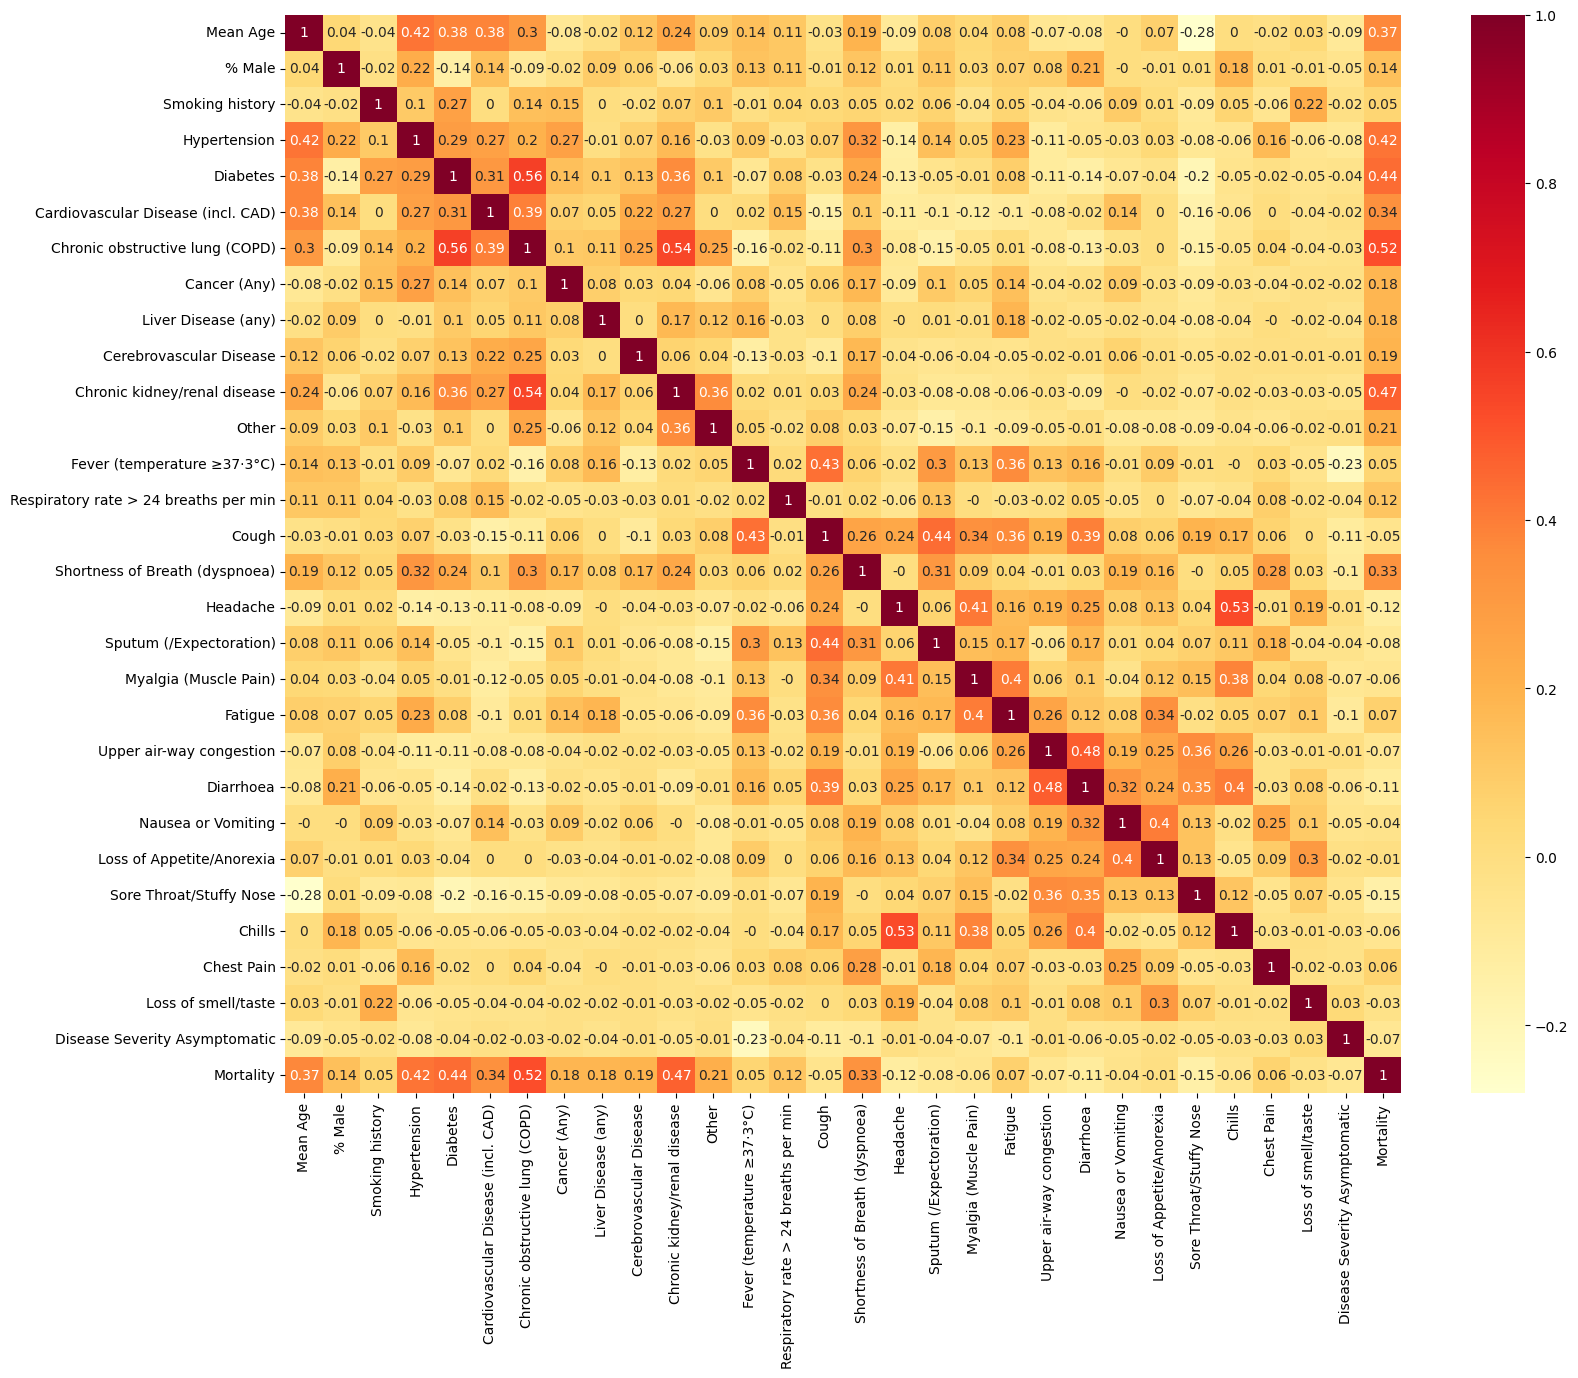

In [11]:
# Correlation heat map 
fig, ax = plt.subplots(figsize=(18,14)) 

correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlOrRd")

In [12]:
# Polynomial regression 
poly_features= PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
# Predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
  

In [13]:
# Calculate residuals 
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

In [14]:
# sns.scatterplot(y_train, y_train_predicted, alpha=0.4)
# sns.regplot(y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)

    
# plt.xlabel("Actual: $Y_i$")
# plt.ylabel("Predicted: $\hat{Y}_i$")
# plt.title("Actual  vs Predicted: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
# plt.show()

In [15]:
# Evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
rmse_train,r2_train

(6.622081424350095e-12, 1.0)

In [16]:
# Evaluating the model on test dataset with high r2 value
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)
rmse_test, r2_test

(0.0033581236637747823, 0.99981498405315)